# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1:
A model is considered linear when the relationship between the dependent variable y and the independent variable x can be expressed as a linear combination of parameters. A model is linear in its parameters/coefficients not necessarily in its variables

2:
The coefficient for a dummy variable represents the expected difference in the dependent variable when the categorical variable takes that value, relative to the reference category. However, the referency category has to be taken out  (if an intercept is included in a model, the coefficient of a dummy variable represents the difference relative to the baseline category. If the intercept is taken out, the dummy variable directly corresponds to group means)

3:
Linear regressions are no tideal for classification because it assumes a continuous output, while classification problems have categorical outcomes. In some cases, linear regression can be used as a baseline for classification, but there would be differnt issues.

4:Some signs include very high R^2  but much lower in validation/test sets, large number of predictors relative to sample size, high variance in coefficient estimates (unstable predictions).

5:
Multicollinearity occurs when two or more independent variables in a regression are highly correlated. This leads to unstable coefficients and high standard errors.
Step 1: Replace one of the collinear variables with a  variable (IV) that is correlated with the original variable but not with the error term.
Step 2: Use the predicted values from Step 1 to estimate the regression in Step 2.

6: Nonlinear relationships can be modeled by transforming variables such as log transformations, polynomial regressions, and so forth

7: The intercept represents the expected value of  y when all independent variables are 0. The slope coefficient tells  how much y changes for a one-unit increase in x (everything else is constant). The dummy variable coefficient represents the difference in  y for the category represented by the dummy variable relative to the reference group. If the coefficient is positive, it means that group has a higher expected y than the reference group. If negative, it has a lower expected y.







**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

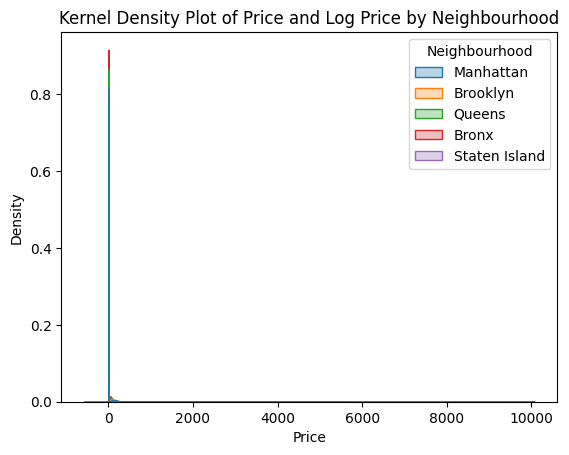

In [49]:
import pandas as pd
df = pd.read_csv("Q1_clean.csv")


df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)
avg_prices_scores = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()

most_expensive_borough = avg_prices_scores['Price'].idxmax()


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df['Log_Price'] = np.log(df['Price'])

sns.kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False, fill=True, alpha=0.3)
sns.kdeplot(data=df, x='Log_Price', hue='Neighbourhood', common_norm=False, fill=True, alpha=0.3)
plt.title('Kernel Density Plot of Price and Log Price by Neighbourhood')
plt.show()


In [50]:
import statsmodels.api as sm

dummies = pd.get_dummies(df['Neighbourhood'], drop_first=False)
X = pd.concat([dummies], axis=1)
y = df['Price']
model_no_intercept = sm.OLS(y, X).fit()
model_no_intercept.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        05:07:59   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628      0.000      55.934      94.619
Brooklyn        127.7474      1.578     80.958      0.000     124.654     130.840
Manhattan       183.6643      1.340    137.029      0.000     181.037     186.291
Queens           96.8572      3.646     26.568      0.000      89.712     104.003
Staten Island   146.1667     14.837      9.852      0.000     117.086     175.248
==============================================================================
Omnibus:                    51232.379   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1192144085.484
Skew:                          22.206   Prob(JB):                         0.00
Kurtosis:                    1138.591   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
df['Neighbourhood'] = df['Neighbourhood'].astype('category')

dummies_with_intercept = pd.get_dummies(df['Neighbourhood'], drop_first=True)

X_with_intercept = pd.concat([dummies_with_intercept], axis=1)
X_with_intercept = sm.add_constant(X_with_intercept)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

X_with_intercept = X_with_intercept.apply(pd.to_numeric, errors='coerce')

X_with_intercept = X_with_intercept.astype(int)


df_cleaned = df.dropna(subset=['Price'])
X_with_intercept_cleaned = X_with_intercept.loc[df_cleaned.index]
y_cleaned = df_cleaned['Price']

print("Data types of X_with_intercept_cleaned:")
print(X_with_intercept_cleaned.dtypes)

print("\nData type of y_cleaned:")
print(y_cleaned.dtype)

if X_with_intercept_cleaned.isna().sum().sum() == 0 and y_cleaned.isna().sum() == 0:
    model_with_intercept = sm.OLS(y_cleaned, X_with_intercept_cleaned).fit()
    print(model_with_intercept.summary())
else:
    print("\nThere are still NaN values in the data.")


Data types of X_with_intercept_cleaned:
const            int64
Brooklyn         int64
Manhattan        int64
Queens           int64
Staten Island    int64
dtype: object

Data type of y_cleaned:
int64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        05:17:49   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
          

In [59]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [60]:
#regrssion on training daata
model_train = sm.OLS(y_train, X_train).fit()
print(model_train.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          5.03e-178
Time:                        05:14:57   Log-Likelihood:            -1.1353e+05
No. Observations:               17722   AIC:                         2.271e+05
Df Residuals:                   17717   BIC:                         2.271e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.7029     11.075      6.835

In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print("RMSE on the test set:", rmse)


RMSE on the test set: 140.86790191815578


**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("pretrial_data.csv")

In [ ]:
df_filtered = df[['held_wo_bail', 'race', 'sex', 'is_poor', 'prior_F', 'case_type']].copy()
df_filtered['Black'] = (df_filtered['race'] == 'B').astype(int)
df_filtered = df_filtered.dropna(subset=['held_wo_bail', 'Black'])
y = df_filtered['held_wo_bail']

In [ ]:
#regression
def run_regression(variables):
    X = sm.add_constant(df_filtered[variables])
    model = sm.OLS(y, X).fit()
    return model

In [ ]:
#variable sets to test
variable_sets = [
    ['Black'],
    ['Black', 'sex'],
    ['Black', 'sex', 'is_poor'],
    ['Black', 'sex', 'is_poor', 'prior_F'],
    ['Black', 'sex', 'is_poor', 'prior_F', 'case_type']
]


In [ ]:
def run_regression(variables, interaction_terms=None):
    X = df_filtered[list(set(variables) & set(df_filtered.columns))].copy()

    if 'sex' in X.columns:
        X = pd.get_dummies(X, columns=['sex'], drop_first=True)
    if 'case_type' in X.columns:
        X = pd.get_dummies(X, columns=['case_type'], drop_first=True)


    if 'is_poor' in X.columns:
        X['is_poor'] = X['is_poor'].astype(int)


    if interaction_terms:
        for term1, term2 in interaction_terms:
            if term1 in X.columns and term2 in X.columns:
                X[f"{term1}_x_{term2}"] = X[term1] * X[term2]  # interaction

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [ ]:
#3
model = run_regression(variables, interaction_terms)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           3.03e-35
Time:                        04:05:44   Log-Likelihood:                -13567.
No. Observations:               22986   AIC:                         2.714e+04
Df Residuals:                   22984   BIC:                         2.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2295      0.004     61.493      0.0

In [ ]:
#5
df = pd.read_csv("pretrial_data.csv")
df_filtered = df[['held_wo_bail', 'race', 'sex', 'is_poor', 'prior_F', 'case_type']].copy()
df_filtered['Black'] = (df_filtered['race'] == 'B').astype(int)
df_filtered['Female'] = (df_filtered['sex'] == 'F').astype(int)  # Female as 1, Male as 0
df_filtered = df_filtered.dropna(subset=['held_wo_bail', 'Black', 'Female'])

df_filtered['Black_x_Female'] = df_filtered['Black'] * df_filtered['Female']
y = df_filtered['held_wo_bail']
X = df_filtered[['Black', 'Female', 'Black_x_Female']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          3.75e-102
Time:                        04:18:00   Log-Likelihood:                -13408.
No. Observations:               22986   AIC:                         2.682e+04
Df Residuals:                   22982   BIC:                         2.686e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2472      0.004     55.

Question 3:
The slope = 0.0728, so Black defendants are 7.28% more likely to be held without bail compared to non-Black defendents.

The R² = 0.007, meaning that race alone explains 0.7% of the variation in whether a defendant is held without bail. This is a low R², indicating that other factors (like prior offenses, case type, or socioeconomic status) likely play a bigger role in bail decisions.

While the racial disparity is statistically significant, it does not mean race alone determines bail decisions. However, the fact that being Black increases the likelihood of detention suggests systemic bias or disparities in the judicial process.






Question 5:
After running a regression that includes an interaction term (Black × sex_Female), it can be analyzed whether Black men and Black women experience different treatment.

Black Coefficient (0.0971, p < 0.001):
Black individuals are 9.71 percentage points more likely to be held without bail compared to non-Black individuals. This suggests a significant racial disparity in bail decisions.

Female Coefficient (-0.0588, p < 0.001):
Women are 5.88 percentage points less likely to be held without bail compared to men, holding race constant. This suggests that being female generally reduces the likelihood of being denied bail.

Black_x_Female Interaction Coefficient (-0.1124, p < 0.001):
The negative and significant interaction term means that Black women face different treatment than Black men in bail decisions. Specifically, the interaction coefficient (-0.1124) suggests that the increased likelihood of being held without bail for Black individuals is mitigated when the individual is also female.

To find the total effect for Black women: 0.0971+(−0.1124)=−0.0153
which means Black women are about 1.53 percentage points less likely than non-Black men to be held without bail.

Overall, Black men experience the highest likelihood of being held without bail. Additionally, Black women face significantly lower bail denial rates compared to Black men and even non-Black men. Furthermore, Non-Black women are the least likely group to be held without bail. So, while race plays a significant role in bail decisions, gender differences are also strongly present, and Black women are treated differently than Black men in a way that reduces their likelihood of bail denial.












Question 6:
Concerns:

Bias in Data:
The dataset reflects past judicial decisions, which may already be biased. If judges have historically discriminated against Black defendants, the model will learn and reinforce that bias.
This can create a feedback loop, where discrimination in past bail decisions continues into the future.

Lack of Individual Context: The model cannot account for unique case details, like a defendant’s personal circumstances or changes in the legal system.

Ethical Risk: If a biased model leads to wrongful pretrial detention, it violates human rights and due process. Defendants have no control or transparency over how the model assesses them.

So overall, no we should not use these models for judicial decision-making without extreme caution and oversight. Instead, they could be used for research to identify biases and improve fairness.